In [1]:
import os

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from os.path import join as path_join

from config import DATA_DIR

# Load data

In [2]:
data = pd.read_csv(path_join(DATA_DIR, 'eng_images.csv'))
print(data.shape)
print(data.info())
data.sample(5, random_state=134)

(8215, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 3 columns):
Unnamed: 0    8215 non-null int64
key           8215 non-null object
caption       8150 non-null object
dtypes: int64(1), object(2)
memory usage: 192.6+ KB
None


,Unnamed: 0,key,caption
5952,5952,9wx18Mk.png,The Mark\n of The\n ex xx\n The rise of The fi...
8074,8074,85ndga.jpg,None
5593,5593,5G5n2d4.png,Hillary Clinton\n On American deaths in Bengha...
3881,3881,1-zeBUERf.jpg,Rise -n- Dine at Emory Village\n June 5 at 8:2...
5165,5165,33JvFKH.jpg,Frank\n 18\n PROVENZANO\n Sheriff\n Somerset C...


In [3]:
from models import detect_text

/home/cyned/anaconda3/envs/ucu/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


loading pretrained model from /home/cyned/Documents/UCUProject/app/TPS-ResNet-BiLSTM-Attn.pth...
Loading /home/cyned/Documents/UCUProject/app/models/craft/craft_mlt_25k.pth...


# Load metric

In [4]:
%load_ext autoreload
%autoreload 2
from metric.intersection import intersection_metric, train_test_split, wer_metric as wer_metric_
from timeit_ import timeit_context

inter_metric = intersection_metric()
wer_metric = wer_metric_()

train, test = train_test_split(data)

## Textract end-to-end model

In [5]:
%load_ext autoreload
%autoreload 2

from models import get_text
from models import PostProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
with timeit_context('Total time'):
    preds = [get_text(f=path_join(DATA_DIR, 'images', sample)) for sample in tqdm(test.key, desc='Parse text')]

Parse text: 100%|██████████| 1643/1643 [21:07<00:00,  1.92it/s]

Total time:	21min 7.88sec


In [7]:
corrected_preds = PostProcessor().transform(preds)

In [ ]:
with timeit_context('Total time'):
    print(f'{inter_metric(preds)*100:.2f}%')
    print(f'{wer_metric(preds):.4f}')

## Metrics
- 51.44%, 0.54 (baseline)

On 822 samples:
Steps model:
- Intersection: 61.41%
- WER: 0.6360

End-to-end ext metrics
- Intersection: 40.97%
- WER: 0.6618

766
----- Target
shared l AM THE TEA PARTY!'s photo.\n 30 mins\n Really! Not me.\n IF ARE SO OUTRAGED\n AT TRUMP's USE OF NAUGHTY WORDS\n FaceBO\n WHO IN THE HELL BOUGHT 80 MILLION\n U COPIES OF 50 SHADES OF GREYP\n Ih Like\n Comment\n Share\n Not a fair comparison. The woman in 50 Shades of Grey\n consented to what happened to her because she enjoyed it. She was "in on\n it", so to speak. The women Trump was talking about weren't. They didn't\n consent. Anyone he did that to was a victim\n Like Reply\n 1 min
----- Steps model
shared am partyls photo the tea 30 mins if reallyl not me americanwomen are so outraged insten trumps naughty words at use of fifty shades grey of witty of had tros incondyconsentantings facebo 80 million who bought in the hell 50 shades greyp copies of of like comment share not fair comparison the c 50 shades of grey woman a consented what happened her because she enjoyed it she lin to to was on ity trump about they didnt to speak the talking werent women so was

Count intersections: 100%|██████████| 1/1 [00:00<00:00, 2267.19it/s]

shared am party photo the tea 30 mind if really not me american women are so outraged instep troops naughty words at use of fifty shades grey of witty of had trot incondyconsentantings face 80 million who bought in the hell 50 shades grey copies of of like comment share not fair comparison the c 50 shades of grey woman a consented what happened her because she enjoyed it she in to to was on it tramp about they didn to speak the talking were women so was anyone he did that victim consent to was to like min reply constructionalizes
----- End-to-end model
shared I AM THE TEA PARTYl's photo. 30 mins -  Really! Not me.  Irmmmnu‘wnmmiinisimuiﬁjain E or nnuanmwonnst     Like Comment Share  _ Not a fair comparison. The woman in 50 Shades of Grey consented to what happened to her because she enjoyed it. She was "in on  it", so to speak. The women Trump was talking about weren‘t. They didn‘t consent. Anyone he did that to was a victim.  Like - Reply - 1 min  
Intersection: 0.5952381434240306
Int

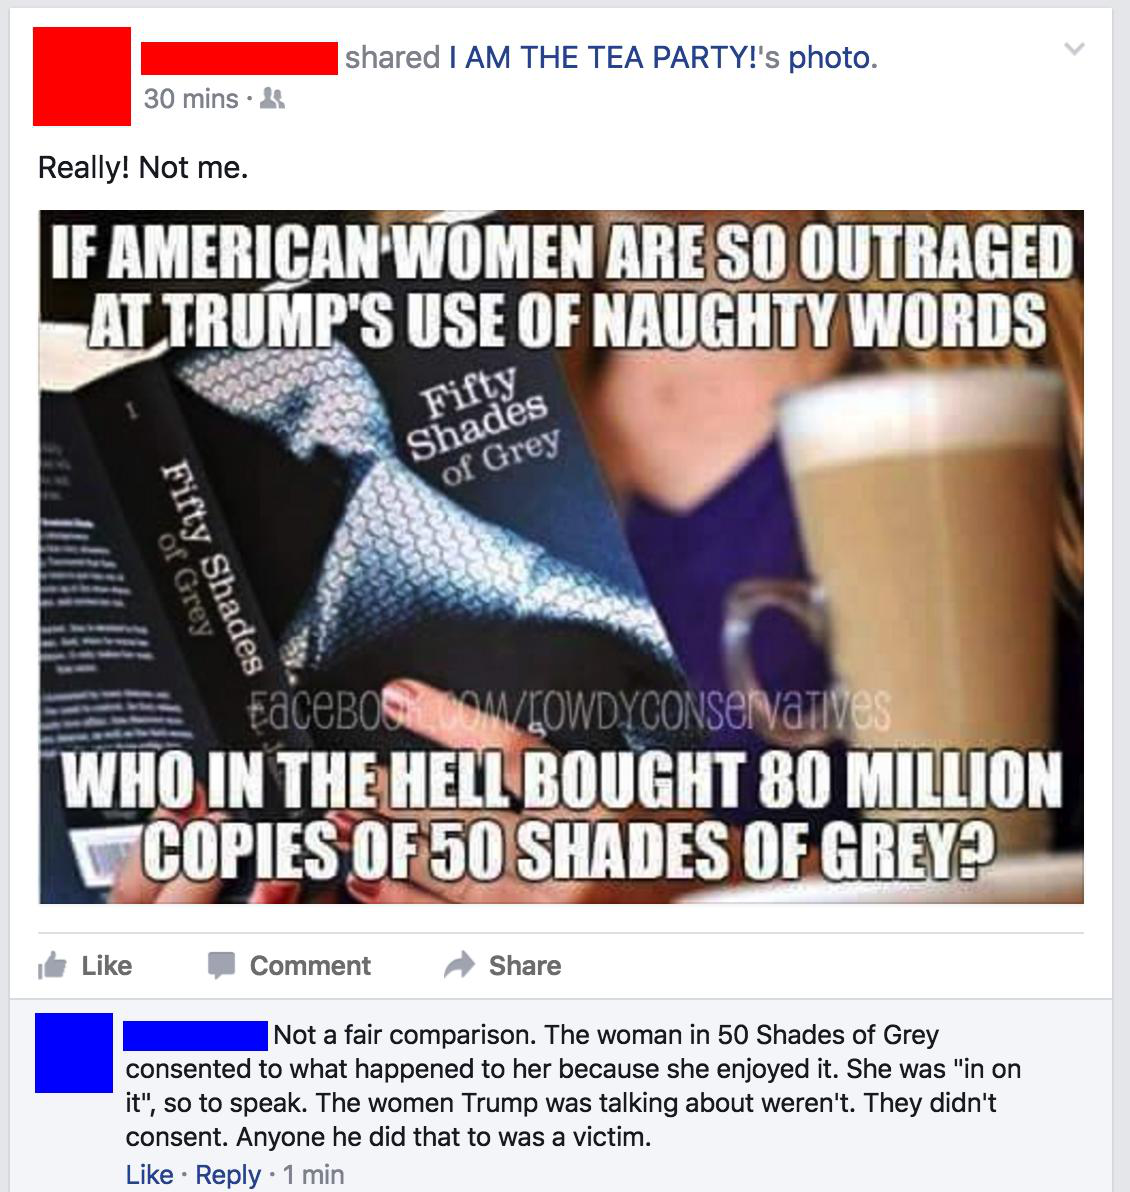

In [57]:
from random import randint 
from metric import intersection, text_detection_tokenizer
from models import post_processor

index = randint(0, pred.shape[0])
pred = pd.read_csv(path_join(DATA_DIR, 'pred.csv')).fillna('')

print(index)
print('=' * 50)
print('----- Target')
print(pred.caption.iloc[index])
print('=' * 50)
print('----- Steps model')
print(pred.text.iloc[index])
print('=' * 50)
print('----- Post process')
post = post_processor.correct(pred.text.iloc[index])
print(post)
print('=' * 50)
print('----- End-to-end model')
print(pred.end_to_end_text.iloc[index].replace('\n', ' '))
print('=' * 50)
print('Intersection: ', end='')
print(intersection(y_true=[text_detection_tokenizer(pred.caption.iloc[index])], y_pred=[text_detection_tokenizer(pred.end_to_end_text.iloc[index])]))
print('Intersection metric: ', end='')
print(intersection(y_true=[text_detection_tokenizer(pred.caption.iloc[index])], y_pred=[text_detection_tokenizer(pred.text.iloc[index])]))
print('Intersection metric(post): ', end='')
print(intersection(y_true=[text_detection_tokenizer(pred.caption.iloc[index])], y_pred=[text_detection_tokenizer(post)]))


Image.open(path_join(DATA_DIR, 'images/', pred.key.iloc[index]))